# Asymmetric Total Variation Example

In [8]:
import sys, os

sys.path.append(os.path.abspath('../../asym_tvd'))

In [210]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

mpl.rcParams["figure.figsize"] = [30, 10]
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["legend.fontsize"] = 20
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%autoreload 2
from asym_tvd.tvd import asym_tvd_linear

Signal parameters

In [106]:
SIGNAL_LENGTH = 1000
NUM_PIECES = 5
NUM_FREQS = 4

Generate signal

In [216]:
t = np.arange(SIGNAL_LENGTH)
signal = np.zeros(shape=(SIGNAL_LENGTH, ))

piece_len = SIGNAL_LENGTH / (NUM_PIECES)

for p in range(NUM_PIECES):
    p_start = int(p * piece_len)
    p_end = int((p + 1) * piece_len)
    
    a = np.random.normal()
    
    
    if p > 0:
        b = signal[p_start - 1]
    else:
        b = 0
        
    signal[p_start:p_end] = a * np.arange(p_end - p_start) + b
    
  
s_std = np.std(signal)

freqs = np.random.uniform(SIGNAL_LENGTH / 100, SIGNAL_LENGTH / 5, NUM_FREQS)

for f in freqs:
    signal += s_std * np.sin(2 * np.pi * t / f)
         
signal += np.random.normal(0, np.std(signal) / 4, SIGNAL_LENGTH)

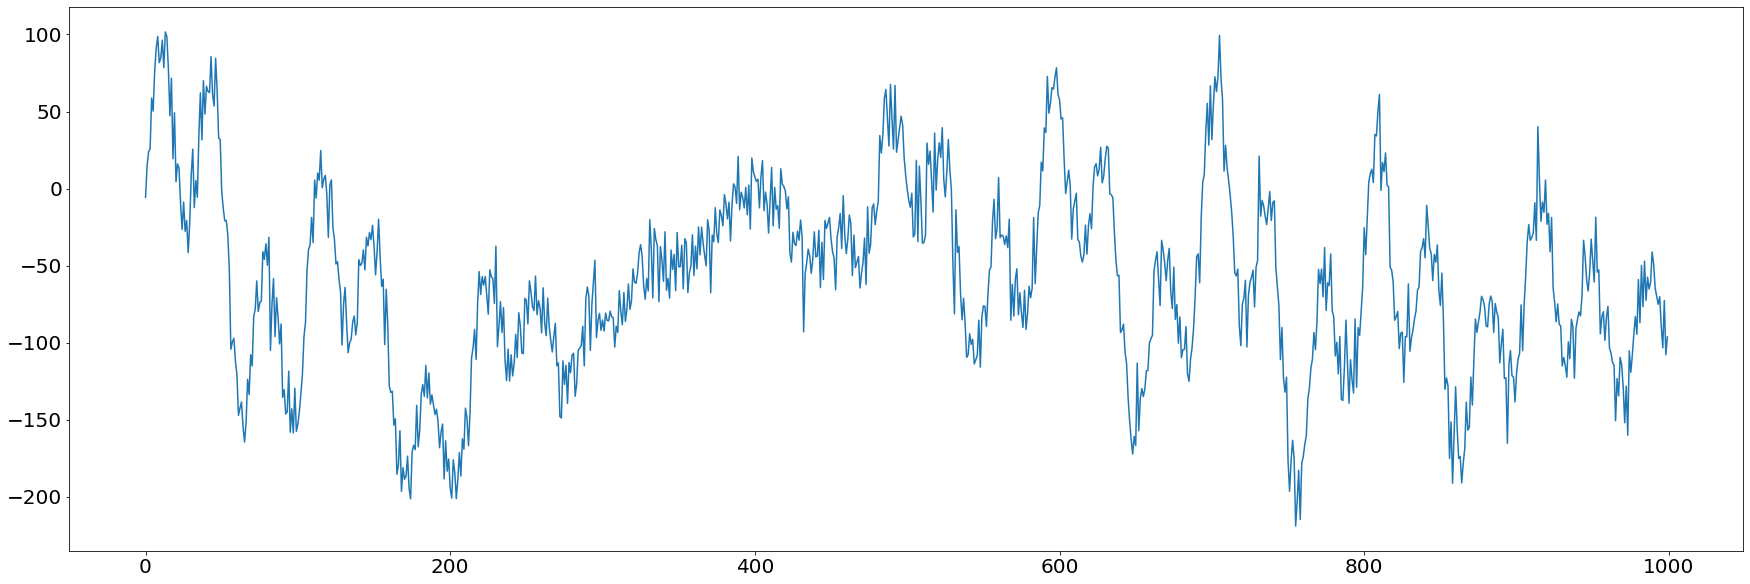

In [217]:
plt.plot(signal)

Apply total variation to generate linear slopes

In [193]:
lam = np.std(signal_1) * 1e+2

res_low, costs_low = asym_tvd_linear(signal_1,
                                    p_asym=0.01,
                                    n_iter=5,
                                    n_tvd_iter=10,
                                    lam=lam,
                                    outliers=None)
res_up, costs_up = asym_tvd_linear(signal_1,
                                    p_asym=1 - 0.01,
                                    n_iter=5,
                                    n_tvd_iter=10,
                                    lam=lam,
                                    outliers=None)

Text(0.5, 1.0, 'Upper slope second difference')

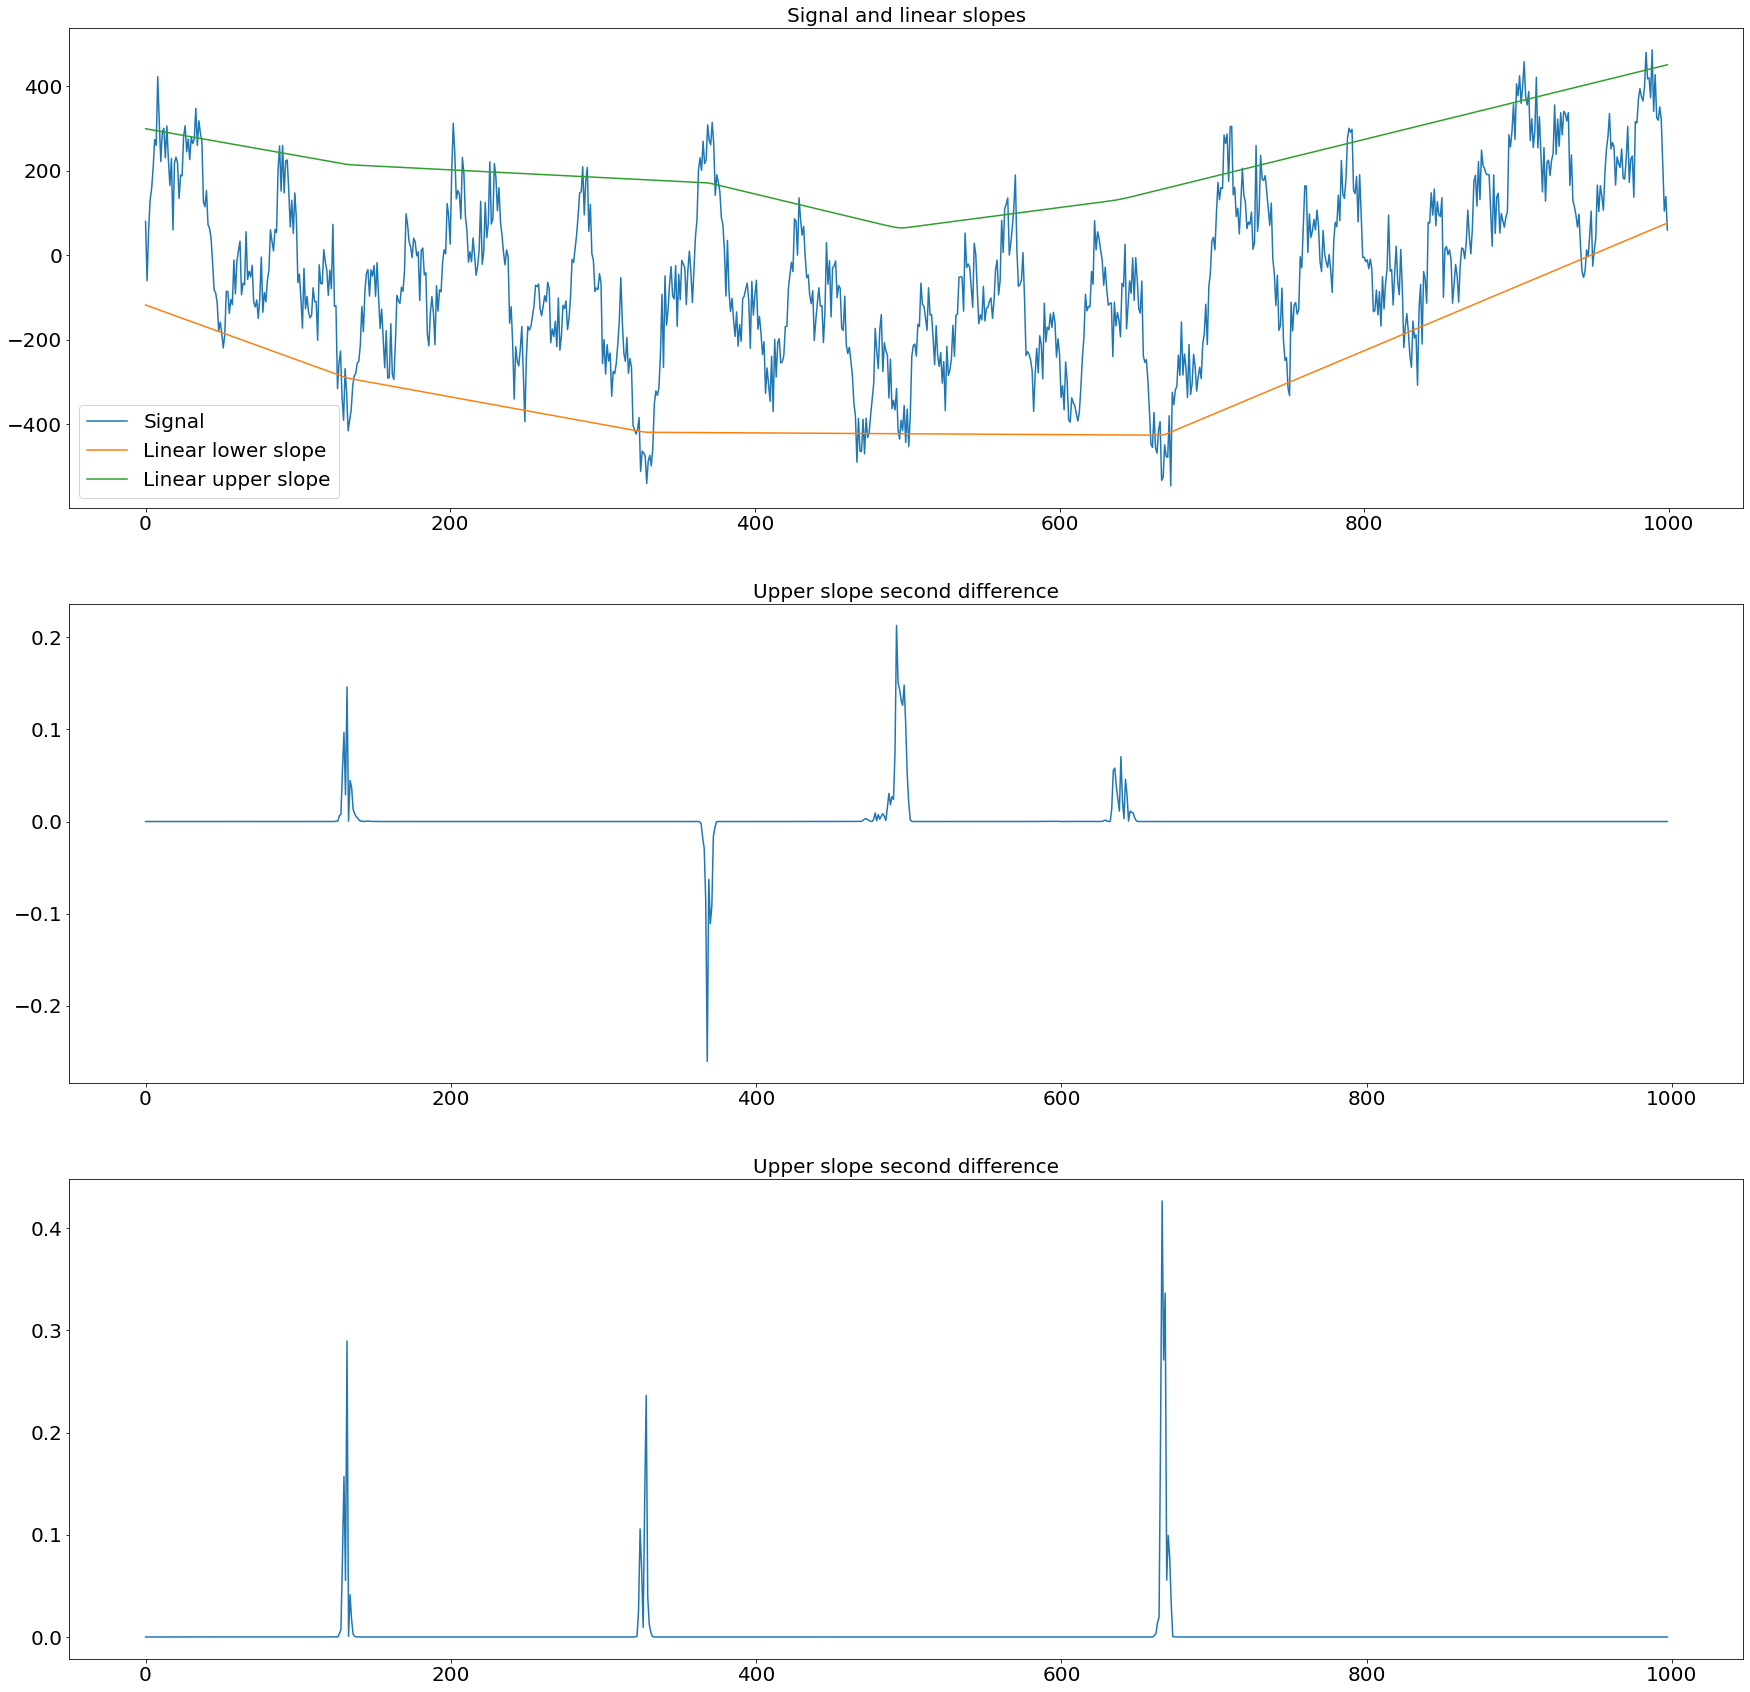

In [212]:
fig, axes = plt.subplots(3, 1, figsize=(30, 30))

axes[0].set_title('Signal and linear slopes')
axes[0].plot(signal_1, label='Signal')
axes[0].plot(res_low, label='Linear lower slope')
axes[0].plot(res_up, label='Linear upper slope')
axes[0].legend()

axes[1].plot(np.diff(res_up, 2))
axes[1].set_title('Upper slope second difference')
axes[2].plot(np.diff(res_low, 2))
axes[2].set_title('Upper slope second difference')

Plot costs

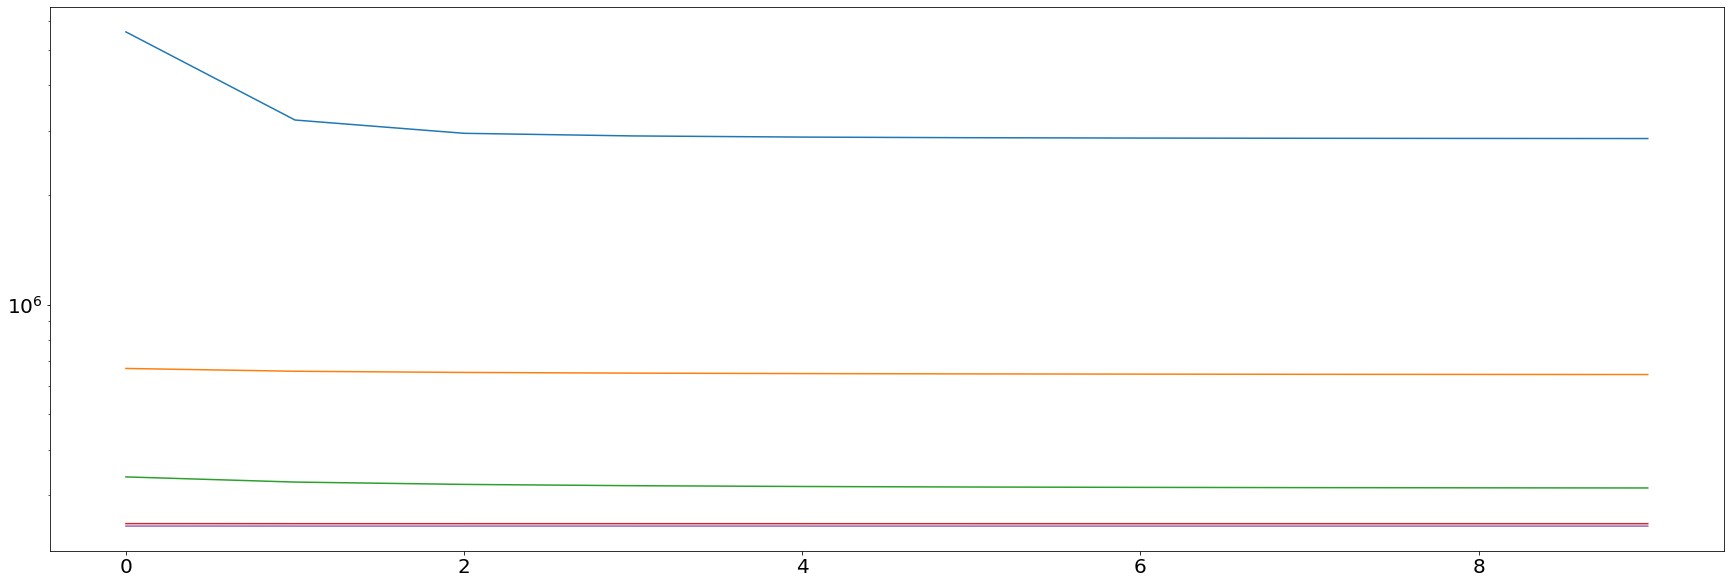

In [224]:
for cost in costs:
    ax = plt.plot(cost)
plt.yscale('log')